<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="figures/kep.png" height=75 width=75>
*This notebook uses routines from [PyKE](http://github.com/keplerGO/PyKE/) which is documented [here](http://pyke.keplerscience.org/). You can find these notebooks on [GitHub](https://github.com/christinahedges/k2torials)*

# Querying NExSci

<!--NAVIGATION-->
< [What are Target Pixel Files?](01.01-Investigating-Target-Pixel-Files.ipynb) | [Contents](index.ipynb) | [Folding a Light Curve](01.03-Folding-A-Lightcurve.ipynb) >

The NASA Exoplanet Archive ([NExA](https://exoplanetarchive.ipac.caltech.edu/)) is a service that hosts data about all exoplanets that are currently confirmed. We can use this service to find exoplanets that we would like to classify. These tutorials are really about processing light curves, but it is useful to be able to quickly find planet data.

We can query the exoplanet archive using PyAstronomy (which you can install with pip). 

Firstly we initialize the database with the command below. This will download the catalog if you don't already have it cached, this should be fairly quick.

In [2]:
from PyAstronomy import pyasl
nexa = pyasl.NasaExoplanetArchive()

Saved data to file:  pyasl/resBased/NEXA.csv.gz  in data directory,
  which has been configured as:  /Users/ch/PyAData
By default, the data will be downloaded anew every 7 days.
You can use the `changeDownloadCycle` to change this behavior.


Then you can select a planet by name to find the data on that planet, given in a python dictionary.

In [51]:
planet=nexa.selectByPlanetName('kepler-8 b')
planet

{'dec': 42.451079999999997,
 'pl_hostname': b'Kepler-8',
 'pl_letter': b'b',
 'pl_massj': 0.58999999999999997,
 'pl_name': b'Kepler-8 b',
 'pl_orbincl': 83.977999999999994,
 'pl_orbper': 3.5224991000000001,
 'pl_orbsmax': 0.047399999999999998,
 'pl_radj': 1.4159999999999999,
 'pl_trandep': nan,
 'pl_trandur': nan,
 'pl_tranmid': 2454954.11931,
 'ra': 281.288118,
 'st_acts': nan,
 'st_dist': 1330.0,
 'st_logg': 4.1699999999999999,
 'st_mass': 1.21,
 'st_rad': 1.49,
 'st_teff': 6213.0,
 'st_vj': 13.9,
 'st_vsini': 10.5}

We can also compare the full data set by loading all the data. I have loaded it into a pandas datafram to view it a little more easily.

In [56]:
import numpy as np
import pandas as pd

df=pd.DataFrame(nexa.data)
df

,pl_hostname,pl_name,pl_letter,ra,dec,pl_orbper,pl_massj,pl_radj,pl_trandep,pl_trandur,...,pl_orbsmax,pl_orbincl,st_rad,st_dist,st_mass,st_teff,st_vsini,st_logg,st_acts,st_vj
0,b'Kepler-1080',b'Kepler-1080 b',b'b',296.464522,49.182915,77.254840,NaN,0.293,NaN,0.428920,...,NaN,NaN,1.16,688.0,1.10,5956.0,NaN,4.35,NaN,NaN
1,b'Kepler-1081',b'Kepler-1081 b',b'b',289.444520,41.317757,3.856919,NaN,0.090,NaN,0.082662,...,NaN,NaN,0.84,425.0,0.88,5345.0,NaN,4.54,NaN,NaN
2,b'Kepler-1082',b'Kepler-1082 b',b'b',289.358672,50.598484,1.543207,NaN,0.100,NaN,0.108725,...,NaN,NaN,1.14,628.0,1.03,5923.0,NaN,4.33,NaN,NaN
3,b'Kepler-1083',b'Kepler-1083 b',b'b',283.161951,45.198315,33.417799,NaN,0.300,NaN,0.189540,...,NaN,NaN,0.77,912.0,0.81,5049.0,NaN,4.58,NaN,NaN
4,b'Kepler-1056',b'Kepler-1056 b',b'b',299.525980,46.899261,27.495606,NaN,0.269,NaN,0.209330,...,NaN,NaN,1.20,971.0,1.12,6127.0,NaN,4.33,NaN,NaN
5,b'Kepler-1058',b'Kepler-1058 b',b'b',294.595783,45.875034,110.965460,NaN,0.243,NaN,0.535040,...,NaN,NaN,0.69,525.0,0.73,4644.0,NaN,4.63,NaN,NaN
6,b'Kepler-1059',b'Kepler-1059 b',b'b',289.220209,41.706486,3.764191,NaN,0.154,NaN,0.085817,...,NaN,NaN,0.72,673.0,0.75,4906.0,NaN,4.61,NaN,NaN
7,b'Kepler-1060',b'Kepler-1060 b',b'b',286.025189,39.630929,46.877937,NaN,0.212,NaN,0.401460,...,NaN,NaN,0.99,861.0,0.99,5797.0,NaN,4.44,NaN,NaN
8,b'Kepler-1061',b'Kepler-1061 b',b'b',296.230004,50.275230,2.757983,NaN,0.177,NaN,0.095442,...,NaN,NaN,1.07,585.0,1.09,6067.0,NaN,4.42,NaN,NaN
9,b'Kepler-351',b'Kepler-351 d',b'd',286.452706,42.657879,142.544247,NaN,0.243,NaN,0.372880,...,NaN,NaN,0.85,NaN,0.89,5643.0,NaN,4.56,NaN,NaN


This can be particularly useful if you would like to find a planet of a particular period, mass or radius. We can use the above dataframe to plot a mass/radius diagram and show where all the Kepler planets sit.

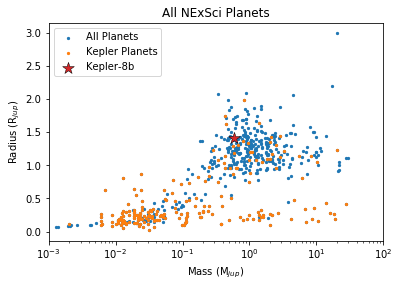

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline

#Find all planets with host stars starting with 'Kepler':
kep_planets=np.asarray([n.startswith('Kepler') for n in np.asarray(df.pl_hostname,dtype=str)])



#Plot mass/radius diagram
plt.scatter(df.pl_massj,df.pl_radj,s=5,label='All Planets')
plt.scatter(df.pl_massj[kep_planets],df.pl_radj[kep_planets],s=5,label='Kepler Planets')
plt.scatter(planet['pl_massj'],planet['pl_radj'],s=150,c='C3',marker='*',lw=0.5,edgecolor='black',label='Kepler-8b')
plt.legend()
plt.xscale('log')
plt.xlim(0.001,100)
plt.ylabel('Radius (R$_{jup}$)')
plt.xlabel('Mass (M$_{jup}$)')
plt.title('All NExSci Planets')

<!--NAVIGATION-->
< [What are Target Pixel Files?](01.01-Investigating-Target-Pixel-Files.ipynb) | [Contents](index.ipynb) | [Folding a Light Curve](01.03-Folding-A-Lightcurve.ipynb) >